In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import inequalipy as ineq
import math
from statistics import mean 

## 2013-2017 DATA

In [46]:
std_2017_df = pd.read_csv('../data/standard_dataframes/standard_acs_censustract_df_2017/standard_acs_censustract_df_2017.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (288) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
std_2017_df.head()

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood,Correct tract and county?
0,arlington,121609,48,439,48439121609,"POLYGON ((-97.233694 32.67175, -97.23366399999...",5430.0,5430.0,2785.0,136.0,...,0.076309,0.128928,0.036160,0.343142,0.141147,0.053367,0.044638,NaN,NaN,1
1,arlington,111522,48,439,48439111522,"POLYGON ((-97.09783299999999 32.691837, -97.09...",7945.0,7945.0,3984.0,417.0,...,0.062474,0.121638,0.065991,0.077369,0.030616,0.003310,0.000000,NaN,NaN,1
2,arlington,113109,48,439,48439113109,"POLYGON ((-97.08536599999999 32.762276, -97.08...",4142.0,4142.0,2149.0,257.0,...,0.074138,0.207586,0.078966,0.234138,0.097931,0.012759,0.038276,NaN,NaN,1
3,arlington,111516,48,439,48439111516,"POLYGON ((-97.13506099999999 32.675269, -97.13...",7107.0,7107.0,3596.0,123.0,...,0.095658,0.209685,0.071088,0.209685,0.039361,0.005964,0.005010,NaN,NaN,1
4,arlington,111505,48,439,48439111505,"POLYGON ((-97.169399 32.73156, -97.169375 32.7...",4321.0,4321.0,1935.0,136.0,...,0.077207,0.218530,0.067808,0.245384,0.086606,0.014770,0.026855,NaN,NaN,1


### Theil Index

In [48]:
def theil_index(df, column_name):    
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Theil Index'])

    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city[column_name]
        df_city_avg_broadband = df_city[column_name].mean()
        broadband_quotient = df_city_broadband/df_city_avg_broadband
        log_quotient = np.log(broadband_quotient)
        quotient = broadband_quotient*log_quotient
        N = len(df_city)
        theil = quotient.sum()/N
        
        result.loc[city, 'Theil Index'] = theil
    
    result['Theil Index'] = result['Theil Index'].apply(pd.to_numeric)
    result = result.sort_values('Theil Index', ascending=False)
    
    
    return result

In [49]:
theil_df_2017 = theil_index(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
theil_df_2017.reset_index(inplace=True)
theil_df_2017 = theil_df_2017.rename(columns = {'index':'City'})
theil_df_2017['Theil rank'] = theil_df_2017['Theil Index'].rank(ascending=False)
theil_df_2017 = theil_df_2017.sort_values(by=['Theil Index'])
theil_df_2017

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,City,Theil Index,Theil rank
34,new-york-city,0.000000,35.0
33,portland,0.067947,34.0
32,mesa,0.070399,33.0
31,arlington,0.076486,32.0
30,sacramento,0.078516,31.0
29,tuscon,0.080299,30.0
28,san-jose,0.085952,29.0
27,omaha,0.104123,28.0
26,minneapolis,0.104783,27.0
25,fresno,0.107348,26.0


### Atkinson Index

In [50]:
def atkinson_index(df, beta, column_name):
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Atkinson Index'])

    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city[column_name]
        #df_city_population = df_city['Population']
        list_city_broadband = list(df_city_broadband)
        #array_city_population = np.array(df_city_population)
        result.loc[city, 'Atkinson Index'] = ineq.atkinson.index(list_city_broadband, np.absolute(beta))
    
    result['Atkinson Index'] = result['Atkinson Index'].apply(pd.to_numeric)
    result = result.sort_values('Atkinson Index', ascending=False)
    
    return result


In [51]:
# which city contributed most to observed inequality
atkinson_df_2017 = atkinson_index(std_2017_df, 10, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
atkinson_df_2017.reset_index(inplace=True)
atkinson_df_2017 = atkinson_df_2017.rename(columns = {'index':'City'})
atkinson_df_2017['Atkinson rank'] = atkinson_df_2017['Atkinson Index'].rank(ascending=False)
atkinson_df_2017 = atkinson_df_2017.sort_values(by=['Atkinson rank'])
atkinson_df_2017

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/inequalipy/atkinson.py:35: RuntimeWarning: divide by zero encountered in power
  sum_atk += i**(1 - epsilon)


,City,Atkinson Index,Atkinson rank
0,memphis,1.000000,12.5
23,boston,1.000000,12.5
22,chicago,1.000000,12.5
21,dallas,1.000000,12.5
20,denver,1.000000,12.5
19,houston,1.000000,12.5
18,el-paso,1.000000,12.5
17,austin,1.000000,12.5
15,washington-dc,1.000000,12.5
14,detroit,1.000000,12.5


### Palma Ratio

In [52]:
def palma_ratio(df, column_name):
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Palma Ratio'])
    
    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city[column_name]
        array_city_broadband = np.array(df_city_broadband)
        palma_r = np.percentile(array_city_broadband, 90)/np.percentile(array_city_broadband, 40)
        result.loc[city, 'Palma Ratio'] = palma_r
    
    result['Palma Ratio'] = result['Palma Ratio'].apply(pd.to_numeric)
    result = result.sort_values('Palma Ratio', ascending=False)
    
    return result

In [53]:
# A high Palma ratio indicates a greater degree of inequality or unequal broadband distribution in a city
palma_df_2017 = palma_ratio(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
palma_df_2017.reset_index(inplace=True)
palma_df_2017 = palma_df_2017.rename(columns = {'index':'City'})
palma_df_2017['Palma rank'] = palma_df_2017['Palma Ratio'].rank(ascending=False)
palma_df_2017 = palma_df_2017.sort_values(by=['Palma rank'])
palma_df_2017

,City,Palma Ratio,Palma rank
0,atlanta,2.953892,1.0
1,memphis,2.643633,2.0
2,houston,2.594018,3.0
3,oklahoma-city,2.561439,4.0
4,washington-dc,2.463515,5.0
5,wichita,2.452627,6.0
6,kansas-city,2.446903,7.0
7,chicago,2.426829,8.0
8,san-antonio,2.411282,9.0
9,indianapolis,2.355805,10.0


### Decile Ratio

In [54]:
def decile_ratio(df, column_name):
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Decile Ratio'])
    
    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city[column_name]
        array_city_broadband = np.array(df_city_broadband)
        decile_r = np.percentile(array_city_broadband, 90)/np.percentile(array_city_broadband, 10)
        result.loc[city, 'Decile Ratio'] = decile_r
    
    result['Decile Ratio'] = result['Decile Ratio'].apply(pd.to_numeric)
    result = result.sort_values('Decile Ratio', ascending=False)
    
    return result

In [55]:
# A high Decile ratio indicates a greater degree of inequality or unequal broadband distribution in a city
decile_df_2017 = decile_ratio(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
decile_df_2017.reset_index(inplace=True)
decile_df_2017 = decile_df_2017.rename(columns = {'index':'City'})
decile_df_2017['Decile rank'] = decile_df_2017['Decile Ratio'].rank(ascending=False)
decile_df_2017 = decile_df_2017.sort_values(by=['Decile rank'])
decile_df_2017

,City,Decile Ratio,Decile rank
0,boston,9.821156,1.0
1,memphis,9.202765,2.0
2,atlanta,6.967514,3.0
3,oklahoma-city,5.808433,4.0
4,chicago,5.507380,5.0
5,washington-dc,5.393789,6.0
6,detroit,5.382353,7.0
7,kansas-city,5.344981,8.0
8,houston,5.141897,9.0
9,indianapolis,4.943026,10.0


### Gini Index

In [56]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    gini_index=(fair_area - area) / fair_area
    return gini_index

In [57]:
def final_gini(df, column_name):
    cities = df['City'].unique()

    ls = []
    for city in cities:
        city_values = df[df['City']==city][column_name]
        gini_value = gini(city_values)
        ls.append([city, gini_value])
        
    gini_data = pd.DataFrame(ls, columns=['City', 'Gini']) 
    gini_data.sort_values(by ='Gini', ascending = 0)
    return gini_data


In [58]:
gini_data_2017 = final_gini(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
gini_data_2017['Gini rank'] = gini_data_2017['Gini'].rank(ascending=False)
gini_data_2017 = gini_data_2017.sort_values(by=['Gini rank'])
gini_data_2017

,City,Gini,Gini rank
17,memphis,0.393825,1.0
1,atlanta,0.370091,2.0
5,chicago,0.365762,3.0
10,fort-worth,0.346785,4.0
21,oklahoma-city,0.346551,5.0
13,indianapolis,0.334573,6.0
12,houston,0.333898,7.0
8,detroit,0.331235,8.0
9,el-paso,0.330462,9.0
14,kansas-city,0.328560,10.0


### Mean Log Deviation

In [59]:
def mean_log_dev(list_of_values):
    log_list = []
    mean_value = list_of_values.mean()
    log_mean = np.log(mean_value)
    for value in list_of_values:
        log_x = np.log(value)
        log_list.append(log_x)
    mean_log = mean(log_list)
    mean_log_dev = log_mean - mean_log
    return mean_log_dev

In [60]:
def mean_log_dev_final(df, column_name):
    cities = df['City'].unique()
    log_s = []
    for city in cities:
        city_values = df[df['City']==city][column_name]
        mean_log_dev_value = mean_log_dev(city_values)
        log_s.append([city, mean_log_dev_value])
        
    mean_log_data = pd.DataFrame(log_s, columns=['City', 'Mean log deviation']) 
    return mean_log_data


In [61]:
mean_log_data_2017 = mean_log_dev_final(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
mean_log_data_2017['Mean log deviation rank'] = mean_log_data_2017['Mean log deviation'].rank(ascending=False)
mean_log_data_2017 = mean_log_data_2017.sort_values(by=['Mean log deviation rank'])
mean_log_data_2017

/var/folders/25/hlzs3hpj6w9g495524qsm2600000gn/T/ipykernel_59910/2278421374.py:6: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(value)


,City,Mean log deviation,Mean log deviation rank
16,louisville,inf,12.5
23,philadelphia,inf,12.5
27,san-antonio,inf,12.5
21,oklahoma-city,inf,12.5
28,san-diego,inf,12.5
29,san-jose,inf,12.5
17,memphis,inf,12.5
33,washington-dc,inf,12.5
15,los-angeles,inf,12.5
14,kansas-city,inf,12.5


### IQR

In [62]:
def iqr_broadband(city,df,column_name): 

    df_city = df[df['City'] == city]
    df_city_broadband = df_city[column_name]
    array_city_broadband = np.array(df_city_broadband)
    Q3 = np.quantile(array_city_broadband, 0.75) 
    Q1 = np.quantile(array_city_broadband, 0.25)
    iqr_results = Q3 - Q1
    
    return iqr_results

In [63]:
def iqr_final(df, column_name):
    results_iqr = []

    for city in df['City'].unique():
        results_iqr.append(iqr_broadband(city,df, column_name))
        
    iqr_broadband_df = pd.DataFrame({'City': df['City'].unique(), "IQR Broadband" : results_iqr})
    return iqr_broadband_df



In [64]:
iqr_broadband_df_2017 = iqr_final(std_2017_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct17")
iqr_broadband_df_2017["IQR rank"] = iqr_broadband_df_2017["IQR Broadband"].rank(ascending=False)
iqr_broadband_df_2017 = iqr_broadband_df_2017.sort_values(by=["IQR rank"])
iqr_broadband_df_2017

,City,IQR Broadband,IQR rank
1,atlanta,1285.25,1.0
30,seattle,1264.00,2.0
10,fort-worth,1172.00,3.0
12,houston,1106.00,4.0
27,san-antonio,1096.00,5.0
13,indianapolis,1002.00,6.0
28,san-diego,975.50,7.0
4,boston,955.25,8.0
17,memphis,941.00,9.0
2,austin,936.00,10.0


### Final Result Summary

In [65]:
inequality_df_2017 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(gini_data_2017,atkinson_df_2017,on='City'),theil_df_2017,on='City'),mean_log_data_2017,on='City'), palma_df_2017,on='City'),decile_df_2017,on='City'),iqr_broadband_df_2017,on='City') 
inequality_df_2017

,City,Gini,Gini rank,Atkinson Index,Atkinson rank,Theil Index,Theil rank,Mean log deviation,Mean log deviation rank,Palma Ratio,Palma rank,Decile Ratio,Decile rank,IQR Broadband,IQR rank
0,memphis,0.393825,1.0,1.000000,12.5,0.264909,1.0,inf,12.5,2.643633,2.0,9.202765,2.0,941.00,9.0
1,atlanta,0.370091,2.0,1.000000,12.5,0.224830,3.0,inf,12.5,2.953892,1.0,6.967514,3.0,1285.25,1.0
2,chicago,0.365762,3.0,1.000000,12.5,0.240802,2.0,inf,12.5,2.426829,8.0,5.507380,5.0,777.50,21.0
3,fort-worth,0.346785,4.0,1.000000,12.5,0.206688,5.0,inf,12.5,2.343390,11.0,4.881701,11.0,1172.00,3.0
4,oklahoma-city,0.346551,5.0,1.000000,12.5,0.201372,6.0,inf,12.5,2.561439,4.0,5.808433,4.0,837.75,15.0
5,indianapolis,0.334573,6.0,0.793917,30.0,0.187696,7.0,0.196010,25.0,2.355805,10.0,4.943026,10.0,1002.00,6.0
6,houston,0.333898,7.0,1.000000,12.5,0.182396,9.0,inf,12.5,2.594018,3.0,5.141897,9.0,1106.00,4.0
7,detroit,0.331235,8.0,1.000000,12.5,0.181234,10.0,inf,12.5,2.259259,12.0,5.382353,7.0,451.00,34.0
8,el-paso,0.330462,9.0,1.000000,12.5,0.208604,4.0,inf,12.5,2.255885,13.0,4.592856,13.0,841.25,14.0
9,kansas-city,0.328560,10.0,1.000000,12.5,0.176566,11.0,inf,12.5,2.446903,7.0,5.344981,8.0,918.50,11.0


In [66]:
graph_inequality_df_2017 = inequality_df_2017.drop([34])
graph_inequality_df_2017 =  graph_inequality_df_2017.astype({'Theil rank' : "int", 'Atkinson rank' : "int" ,"Palma rank" : "int", "Decile rank" : "int","Gini rank" : "int", "Mean log deviation rank" : "int", "IQR rank" : "int" })
graph_inequality_df_2017 = graph_inequality_df_2017.drop(columns=["Gini rank", "Atkinson rank", "Theil rank", "Palma rank", "Decile rank", "Mean log deviation rank", "IQR rank"])
graph_inequality_df_2017 

,City,Gini,Atkinson Index,Theil Index,Mean log deviation,Palma Ratio,Decile Ratio,IQR Broadband
0,memphis,0.393825,1.000000,0.264909,inf,2.643633,9.202765,941.00
1,atlanta,0.370091,1.000000,0.224830,inf,2.953892,6.967514,1285.25
2,chicago,0.365762,1.000000,0.240802,inf,2.426829,5.507380,777.50
3,fort-worth,0.346785,1.000000,0.206688,inf,2.343390,4.881701,1172.00
4,oklahoma-city,0.346551,1.000000,0.201372,inf,2.561439,5.808433,837.75
5,indianapolis,0.334573,0.793917,0.187696,0.196010,2.355805,4.943026,1002.00
6,houston,0.333898,1.000000,0.182396,inf,2.594018,5.141897,1106.00
7,detroit,0.331235,1.000000,0.181234,inf,2.259259,5.382353,451.00
8,el-paso,0.330462,1.000000,0.208604,inf,2.255885,4.592856,841.25
9,kansas-city,0.328560,1.000000,0.176566,inf,2.446903,5.344981,918.50


In [67]:
measures = list(graph_inequality_df_2017.columns)
measures = measures[1:]
measures

['Gini',
 'Atkinson Index',
 'Theil Index',
 'Mean log deviation',
 'Palma Ratio',
 'Decile Ratio',
 'IQR Broadband']

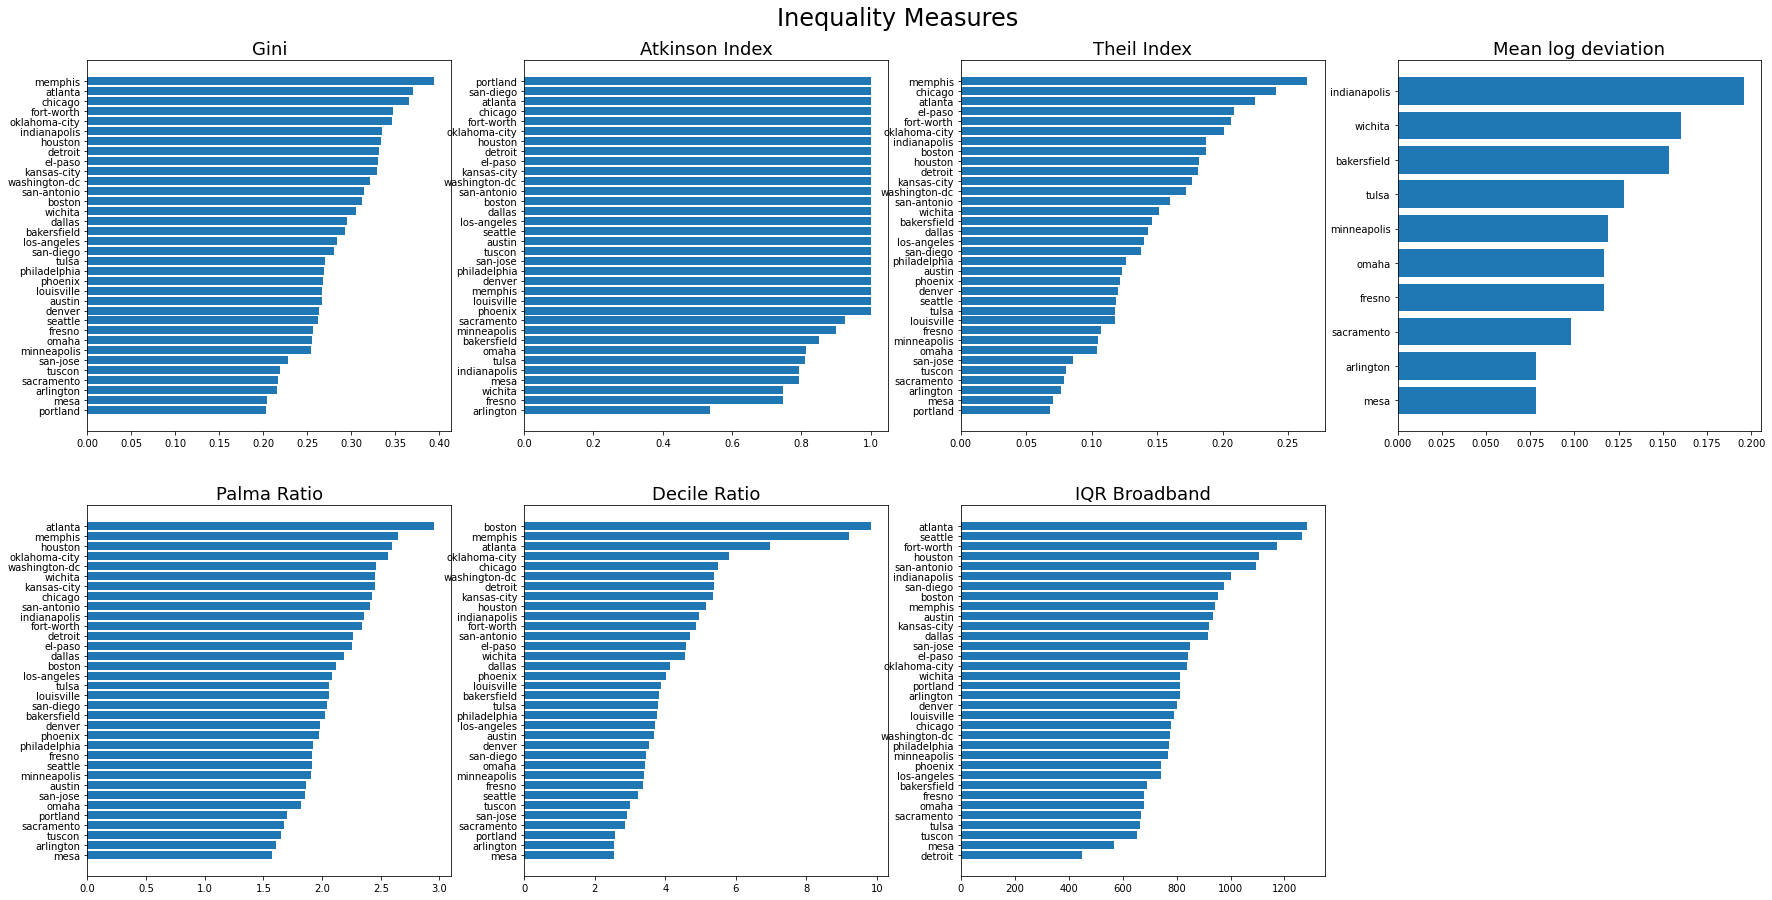

In [89]:
plt.figure(figsize=(30, 15))
plt.suptitle("Inequality Measures", fontsize=24, y=0.93)

for n, measure in enumerate(measures):
    # add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)

    graph_inequality_df_sorted = graph_inequality_df_2017.sort_values(measure)
    ax.barh(graph_inequality_df_sorted['City'], graph_inequality_df_sorted[measure])
    
    ax.set_title(measure, fontsize=18)

## 2017-2021 Data

In [69]:
std_2021_df = pd.read_csv('../data/standard_dataframes/standard_acs_censustract_df_2021/standard_acs_censustract_df_2021.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (195) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
std_2021_df.head()

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct21,Est_Total: SEX BY AGE_tct21,Est_Total: Male: SEX BY AGE_tct21,Est_Total: Male: Under 5 years SEX BY AGE_tct21,...,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct21,Neighborhood,% of Tract within Neighborhood,Correct tract and county?
0,arlington,122802,48,439,48439122802,"POLYGON ((-97.11235000000001 32.708433, -97.11...",5908.0,5908.0,2865.0,350.0,...,0.105566,0.127344,0.045372,0.100726,0.026618,0.002117,0.008167,NaN,NaN,1
1,arlington,121905,48,439,48439121905,"POLYGON ((-97.08042399999999 32.706192, -97.08...",5334.0,5334.0,2765.0,369.0,...,0.020868,0.118815,0.024907,0.111410,0.048805,0.000000,0.000000,NaN,NaN,1
2,arlington,113116,48,439,48439113116,"POLYGON ((-97.072943 32.779226, -97.0726290000...",4396.0,4396.0,2199.0,178.0,...,0.058345,0.233039,0.101425,0.147558,0.055631,0.006445,0.016621,NaN,NaN,1
3,arlington,101302,48,439,48439101302,"POLYGON ((-97.23645500000001 32.731951, -97.23...",3372.0,3372.0,1547.0,98.0,...,0.122751,0.144444,0.057143,0.113757,0.005291,0.012698,0.000529,NaN,NaN,1
4,arlington,121606,48,439,48439121606,"POLYGON ((-97.21003 32.721601, -97.20997800000...",3685.0,3685.0,1739.0,84.0,...,0.034014,0.100907,0.058579,0.252457,0.208995,0.012850,0.019652,NaN,NaN,1


### Theil Index

In [71]:
theil_df_2021 = theil_index(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
theil_df_2021.reset_index(inplace=True)
theil_df_2021 = theil_df_2021.rename(columns = {'index':'City'})
theil_df_2021['Theil rank'] = theil_df_2021['Theil Index'].rank(ascending=False)
theil_df_2021 = theil_df_2021.sort_values(by=['Theil Index'])
theil_df_2021

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,City,Theil Index,Theil rank
34,new-york-city,0.000000,35.0
33,portland,0.053325,34.0
32,arlington,0.064135,33.0
31,sacramento,0.064960,32.0
30,bakersfield,0.064970,31.0
29,tulsa,0.066028,30.0
28,san-jose,0.072687,29.0
27,seattle,0.073159,28.0
26,dallas,0.078862,27.0
25,mesa,0.081307,26.0


### Atkinson Index

In [72]:
# which city contributed most to observed inequality
atkinson_df_2021 = atkinson_index(std_2021_df, 10, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
atkinson_df_2021.reset_index(inplace=True)
atkinson_df_2021 = atkinson_df_2021.rename(columns = {'index':'City'})
atkinson_df_2021['Atkinson rank'] = atkinson_df_2021['Atkinson Index'].rank(ascending=False)
atkinson_df_2021 = atkinson_df_2021.sort_values(by=['Atkinson rank'])
atkinson_df_2021

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/inequalipy/atkinson.py:35: RuntimeWarning: divide by zero encountered in power
  sum_atk += i**(1 - epsilon)


,City,Atkinson Index,Atkinson rank
0,memphis,1.000000,14.0
26,seattle,1.000000,14.0
25,austin,1.000000,14.0
24,washington-dc,1.000000,14.0
23,boston,1.000000,14.0
22,chicago,1.000000,14.0
21,dallas,1.000000,14.0
20,denver,1.000000,14.0
19,detroit,1.000000,14.0
18,el-paso,1.000000,14.0


### Palma Ratio

In [73]:
# A high Palma ratio indicates a greater degree of inequality or unequal broadband distribution in a city
palma_df_2021 = palma_ratio(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
palma_df_2021.reset_index(inplace=True)
palma_df_2021 = palma_df_2021.rename(columns = {'index':'City'})
palma_df_2021['Palma rank'] = palma_df_2021['Palma Ratio'].rank(ascending=False)
palma_df_2021 = palma_df_2021.sort_values(by=['Palma rank'])
palma_df_2021

,City,Palma Ratio,Palma rank
0,memphis,2.246064,1.0
1,san-antonio,2.224941,2.0
2,chicago,2.202717,3.0
3,oklahoma-city,2.181411,4.0
4,detroit,2.036125,5.0
5,wichita,1.977076,6.0
6,boston,1.967225,7.0
7,houston,1.951759,8.0
8,kansas-city,1.948953,9.0
9,atlanta,1.937849,10.0


### Decile Ratio

In [74]:
# A high Decile ratio indicates a greater degree of inequality or unequal broadband distribution in a city
decile_df_2021 = decile_ratio(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
decile_df_2021.reset_index(inplace=True)
decile_df_2021 = decile_df_2021.rename(columns = {'index':'City'})
decile_df_2021['Decile rank'] = decile_df_2021['Decile Ratio'].rank(ascending=False)
decile_df_2021 = decile_df_2021.sort_values(by=['Decile rank'])
decile_df_2021

,City,Decile Ratio,Decile rank
0,boston,14.146109,1.0
1,memphis,6.541762,2.0
2,chicago,4.451954,3.0
3,detroit,4.290657,4.0
4,atlanta,4.109844,5.0
5,oklahoma-city,3.919517,6.0
6,san-antonio,3.809459,7.0
7,louisville,3.722330,8.0
8,kansas-city,3.634133,9.0
9,indianapolis,3.617225,10.0


### Gini Index

In [75]:
gini_data_2021 = final_gini(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
gini_data_2021['Gini rank'] = gini_data_2021['Gini'].rank(ascending=False)
gini_data_2021 = gini_data_2021.sort_values(by=['Gini rank'])
gini_data_2021

,City,Gini,Gini rank
17,memphis,0.330332,1.0
5,chicago,0.321983,2.0
4,boston,0.316334,3.0
8,detroit,0.294148,4.0
21,oklahoma-city,0.291247,5.0
27,san-antonio,0.288871,6.0
1,atlanta,0.270299,7.0
14,kansas-city,0.263339,8.0
13,indianapolis,0.257779,9.0
12,houston,0.252590,10.0


### Mean Log Deviation

In [76]:
mean_log_data_2021 = mean_log_dev_final(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
mean_log_data_2021['Mean log deviation rank'] = mean_log_data_2021['Mean log deviation'].rank(ascending=False)
mean_log_data_2021 = mean_log_data_2021.sort_values(by=['Mean log deviation rank'])
mean_log_data_2021

/var/folders/25/hlzs3hpj6w9g495524qsm2600000gn/T/ipykernel_59910/2278421374.py:6: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(value)


,City,Mean log deviation,Mean log deviation rank
16,louisville,inf,14.0
27,san-antonio,inf,14.0
30,seattle,inf,14.0
25,portland,inf,14.0
24,phoenix,inf,14.0
23,philadelphia,inf,14.0
21,oklahoma-city,inf,14.0
19,minneapolis,inf,14.0
18,mesa,inf,14.0
17,memphis,inf,14.0


### IQR

In [77]:
iqr_broadband_df_2021 = iqr_final(std_2021_df, "Est_Total: With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD_tct21")
iqr_broadband_df_2021["IQR rank"] = iqr_broadband_df_2021["IQR Broadband"].rank(ascending=False)
iqr_broadband_df_2021 = iqr_broadband_df_2021.sort_values(by=["IQR rank"])
iqr_broadband_df_2021

,City,IQR Broadband,IQR rank
27,san-antonio,1158.00,1.0
17,memphis,974.50,2.0
13,indianapolis,955.50,3.0
2,austin,941.00,4.0
5,chicago,847.50,5.0
4,boston,826.50,6.0
21,oklahoma-city,820.50,7.0
1,atlanta,798.00,8.0
28,san-diego,797.00,9.0
10,fort-worth,791.75,10.0


### Final Result Summary

In [78]:
inequality_df_2021 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(gini_data_2021, atkinson_df_2021,on='City'), theil_df_2021,on='City'),mean_log_data_2021,on='City'), palma_df_2021,on='City'),decile_df_2021,on='City'),iqr_broadband_df_2021,on='City') 
inequality_df_2021

,City,Gini,Gini rank,Atkinson Index,Atkinson rank,Theil Index,Theil rank,Mean log deviation,Mean log deviation rank,Palma Ratio,Palma rank,Decile Ratio,Decile rank,IQR Broadband,IQR rank
0,memphis,0.330332,1.0,1.000000,14.0,0.185557,2.0,inf,14.0,2.246064,1.0,6.541762,2.0,974.50,2.0
1,chicago,0.321983,2.0,1.000000,14.0,0.176951,3.0,inf,14.0,2.202717,3.0,4.451954,3.0,847.50,5.0
2,boston,0.316334,3.0,1.000000,14.0,0.196053,1.0,inf,14.0,1.967225,7.0,14.146109,1.0,826.50,6.0
3,detroit,0.294148,4.0,1.000000,14.0,0.149861,4.0,inf,14.0,2.036125,5.0,4.290657,4.0,510.00,34.0
4,oklahoma-city,0.291247,5.0,1.000000,14.0,0.146994,5.0,inf,14.0,2.181411,4.0,3.919517,6.0,820.50,7.0
5,san-antonio,0.288871,6.0,1.000000,14.0,0.138602,6.0,inf,14.0,2.224941,2.0,3.809459,7.0,1158.00,1.0
6,atlanta,0.270299,7.0,1.000000,14.0,0.124645,7.0,inf,14.0,1.937849,10.0,4.109844,5.0,798.00,8.0
7,kansas-city,0.263339,8.0,1.000000,14.0,0.115829,8.0,inf,14.0,1.948953,9.0,3.634133,9.0,743.00,15.0
8,indianapolis,0.257779,9.0,1.000000,14.0,0.107506,10.0,inf,14.0,1.886855,11.0,3.617225,10.0,955.50,3.0
9,houston,0.252590,10.0,1.000000,14.0,0.109775,9.0,inf,14.0,1.951759,8.0,3.147488,14.0,674.25,27.0


In [79]:
graph_inequality_df_2021 = inequality_df_2017.drop([34])
graph_inequality_df_2021 =  graph_inequality_df_2021.astype({'Theil rank' : "int", 'Atkinson rank' : "int", "Palma rank" : "int", "Decile rank" : "int","Gini rank" : "int", "Mean log deviation rank" : "int", "IQR rank" : "int" })
graph_inequality_df_2021 = graph_inequality_df_2021.drop(columns=["Gini rank",  "Theil rank","Atkinson rank", "Palma rank", "Decile rank", "Mean log deviation rank", "IQR rank" ])
graph_inequality_df_2021

,City,Gini,Atkinson Index,Theil Index,Mean log deviation,Palma Ratio,Decile Ratio,IQR Broadband
0,memphis,0.393825,1.000000,0.264909,inf,2.643633,9.202765,941.00
1,atlanta,0.370091,1.000000,0.224830,inf,2.953892,6.967514,1285.25
2,chicago,0.365762,1.000000,0.240802,inf,2.426829,5.507380,777.50
3,fort-worth,0.346785,1.000000,0.206688,inf,2.343390,4.881701,1172.00
4,oklahoma-city,0.346551,1.000000,0.201372,inf,2.561439,5.808433,837.75
5,indianapolis,0.334573,0.793917,0.187696,0.196010,2.355805,4.943026,1002.00
6,houston,0.333898,1.000000,0.182396,inf,2.594018,5.141897,1106.00
7,detroit,0.331235,1.000000,0.181234,inf,2.259259,5.382353,451.00
8,el-paso,0.330462,1.000000,0.208604,inf,2.255885,4.592856,841.25
9,kansas-city,0.328560,1.000000,0.176566,inf,2.446903,5.344981,918.50


In [80]:
measures = list(graph_inequality_df_2021.columns)
measures = measures[1:]
measures

['Gini',
 'Atkinson Index',
 'Theil Index',
 'Mean log deviation',
 'Palma Ratio',
 'Decile Ratio',
 'IQR Broadband']

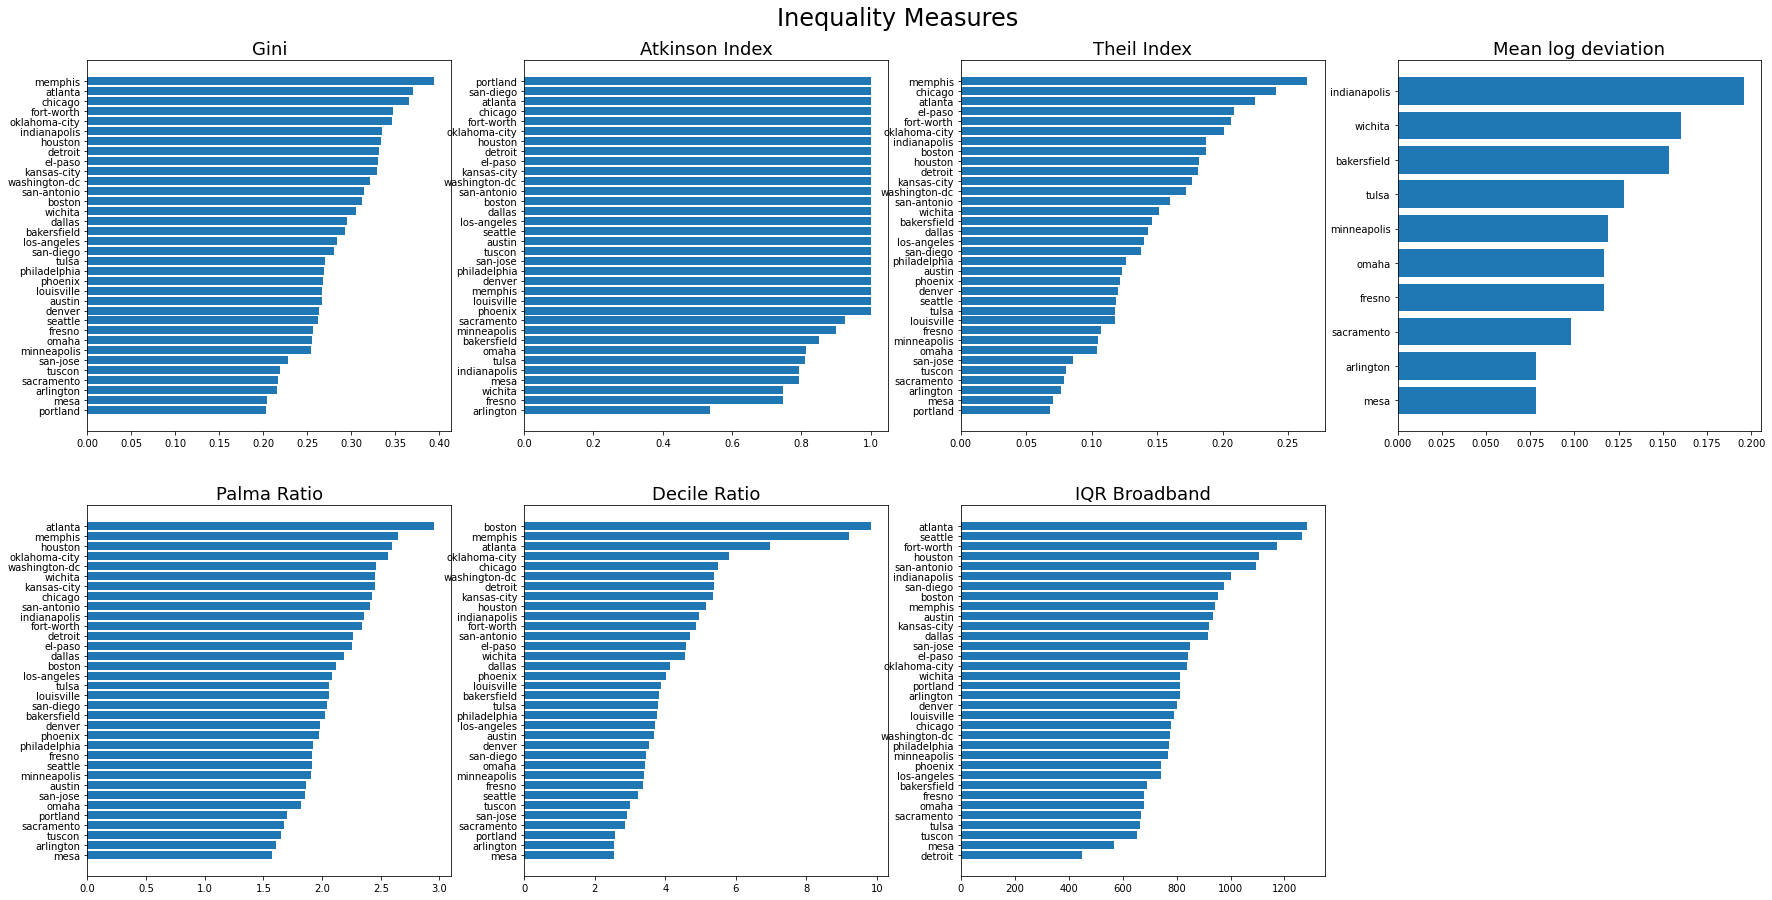

In [81]:
plt.figure(figsize=(30, 15))
plt.suptitle("Inequality Measures", fontsize=24, y=0.93)

for n, measure in enumerate(measures):
    # add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)

    graph_inequality_df_sorted = graph_inequality_df_2021.sort_values(measure)
    ax.barh(graph_inequality_df_sorted['City'], graph_inequality_df_sorted[measure])
    
    ax.set_title(measure, fontsize=18)